In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("turkish_news_70000.csv",index_col = "id")

In [3]:
df =df.head(1000)
df.head()

,main_image,published,site,text,title,url
id,,,,,,
72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


## Veri Hazırlama ve Temizleme

In [4]:
haber_veriseti = df[["text"]]

In [5]:
haber_veriseti

,text
id,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04..."
...,...
73332,"""Haftada 45 enerji içeceği içti: 4 dişi kırıld..."
73333,"""ÜRÜN HABERLERİ İlk yerli trafo yağı üretildi ..."
73334,"""KÜLTÜR SANAT Türkiye kitap okuyor Dünya Öykü ..."


## Genel veri temizleme işlemleri 
Tüm kelimeleri küçük hale getirme, stop wordsleri kaldırma, noktalama işaretlerini kaldırma

In [6]:
# Veri temizleme işlemi için, bir fonksiyon tanımlayalım ve 
# Bu fonksiyonu bütün veri üzerinde uygulayalım
# Öncesinde noktalama işaretleri ve storwords kümelerini tanımlayalım
import re
import string
import nltk
from nltk.corpus import stopwords

nok_isaretleri_kümesi = string.punctuation
# nltk kütüphanesinin etkisiz kelimeler kümesini kullanalım 
etkisiz_kelimeler_kümesi = stopwords.words('turkish') 
# stopwords kümesine biz de istediğimiz kelimeleri ekleyebiliriz
# Örnek:
etkisiz_kelimeler_kümesi.extend(["bir","kadar","sonra"])

def veri_temizleme(metin):
    # Metindeki tüm harfleri küçük duruma getirir.
    metin = metin.lower()
    # Verisetimizdeki yeni satır karekterleri, boşluk karekteriyle değiştirdik.  
    metin = metin.replace("\\n"," ")
    # Kesme işareti ve sonrasındaki karekterlerin kaldırılması
    metin = re.sub("’(\w+)", "", metin) 
    metin = re.sub("'(\w+)", "", metin) 
    metin = re.sub("[“,‘,’,”]", "", metin) 
    # Sayıların Kaldırılması
    metin = re.sub("[0-9]+", "", metin)
    # Noktalama işaretlerinin kaldırılması
    metin = "".join(list(map(lambda x:x if x not in nok_isaretleri_kümesi else " ", metin)))
    # Etkisiz kelimelerin bir kısmının kaldırılması
    metin = " ".join([i for i in metin.split() if i not in etkisiz_kelimeler_kümesi])
    # Metinde tek kalan harfleri de çıkartalım
    metin = " ".join([i for i in metin.split() if len(i) > 1])
    
    return metin

In [7]:
haber_veriseti["temizlenen_metin"] = haber_veriseti["text"].apply(lambda x:veri_temizleme(x))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8320\1196497400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haber_veriseti["temizlenen_metin"] = haber_veriseti["text"].apply(lambda x:veri_temizleme(x))


#### Ham Metin - Temizlenmiş Metin Örneği

In [8]:
haber_veriseti.iloc[5].text

'"Şubat ayında ihracat yüzde 3.7 arttı, ithalat yüzde 18.7 azaldı 04/03/2019 12:20\\nTicaret Bakanı Ruhsar Pekcan şubat ayında ihracatın yüzde 3.7 artışla 14 milyar 312 milyon dolar, ithalatın yüzde 18.7 azalışla 16 milyar 161 milyon dolar olarak gerçekleştiğini açıkladı. Fotoğraf: Reuters\\nBakan Pekcan şunları söyledi: “ Eskiden kullandığımız Özel Ticaret Sistemine göre de şubat ayında ihracatımız yüzde 3,5 artışla 13 milyar 603 milyon dolar olarak gerçekleşmiştir. ÖTS’ye göre ithalatımız şubat ayında yüzde 16,6 düşüşle 15 milyar 793 milyon dolar seviyesinde gerçekleşmiştir. ” Reklam"'

In [9]:
haber_veriseti.iloc[5].temizlenen_metin

'şubat ayında ihracat yüzde arttı ithalat yüzde azaldı ticaret bakanı ruhsar pekcan şubat ayında ihracatın yüzde artışla milyar milyon dolar ithalatın yüzde azalışla milyar milyon dolar olarak gerçekleştiğini açıkladı fotoğraf reuters bakan pekcan şunları söyledi eskiden kullandığımız özel ticaret sistemine göre şubat ayında ihracatımız yüzde artışla milyar milyon dolar olarak gerçekleşmiştir öts göre ithalatımız şubat ayında yüzde düşüşle milyar milyon dolar seviyesinde gerçekleşmiştir reklam'

In [10]:
haber_veriseti.head()

,text,temizlenen_metin
id,,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte görec...
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya millet ittifakı ...
72339,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı i̇yi̇ partililerin istifa gerekçesi akp s...
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...


In [11]:
haber_veriseti["temizlenen_metin_token"] = haber_veriseti["temizlenen_metin"].apply(lambda x: x.split())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8320\1516115380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haber_veriseti["temizlenen_metin_token"] = haber_veriseti["temizlenen_metin"].apply(lambda x: x.split())


In [12]:
haber_veriseti.head()

,text,temizlenen_metin,temizlenen_metin_token
id,,,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte görec...,"[yatırım, bankası, dolar, tl, üçüncü, çeyrekte..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya millet ittifakı ...,"[pi̇ar, araştırma, adana, antalya, millet, itt..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...,"[renaissance, capital, merkez, bankası, hafta,..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı i̇yi̇ partililerin istifa gerekçesi akp s...,"[ağrı, i̇yi̇, partililerin, istifa, gerekçesi,..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...,"[otomobil, pazarı, iki, ayda, yarı, yarıya, er..."


## LDA Model Eğitimi

In [13]:
import gensim
import pyLDAvis.gensim

In [14]:
#Kelime Listesi
tokenlastirilmis_metinler = haber_veriseti["temizlenen_metin_token"]
kelime_listesi=gensim.corpora.Dictionary(tokenlastirilmis_metinler)
#kelime listesi filtreleme
kelime_listesi.filter_extremes(no_below=1,no_above=0.7) #?


In [15]:
#terimlerin vektörleştirilmesi - Doküman terim matrisinin oluşturulması
dokuman_terim_matrisi = [kelime_listesi.doc2bow(terim) for terim in tokenlastirilmis_metinler]

In [16]:
#LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                           id2word= kelime_listesi,
                                           num_topics=15,
                                           passes = 10)






## Çıkarımlar

In [17]:
#Oluşturulan soyut konular içerisinde en fazla bulunan terimler
konular = lda_model.print_topics(num_words = 7)
for konu in konular:
    print(konu)

(0, '0.005*"belediye" + 0.005*"aday" + 0.004*"chp" + 0.004*"parti" + 0.004*"adayı" + 0.004*"i̇stanbul" + 0.004*"milyon"')
(1, '0.005*"değil" + 0.004*"parti" + 0.004*"var" + 0.004*"olarak" + 0.004*"ak" + 0.003*"don" + 0.003*"kişot"')
(2, '0.016*"yakala" + 0.014*"co" + 0.008*"hürriyet" + 0.006*"gün" + 0.005*"türkiye" + 0.004*"milyon" + 0.004*"ilk"')
(3, '0.005*"var" + 0.004*"olarak" + 0.003*"türkiye" + 0.003*"suriye" + 0.003*"önce" + 0.002*"yıl" + 0.002*"i̇stanbul"')
(4, '0.006*"türkiye" + 0.004*"olarak" + 0.004*"i̇stanbul" + 0.003*"teknoloji" + 0.003*"teknofest" + 0.003*"yeni" + 0.003*"göre"')
(5, '0.007*"göre" + 0.006*"yüzde" + 0.005*"türkiye" + 0.005*"olarak" + 0.004*"bin" + 0.004*"yer" + 0.003*"son"')
(6, '0.006*"olarak" + 0.006*"türkiye" + 0.005*"abd" + 0.005*"göre" + 0.003*"suriye" + 0.003*"yüzde" + 0.003*"yıllık"')
(7, '0.003*"koruma" + 0.003*"olarak" + 0.003*"casusluk" + 0.003*"bitki" + 0.003*"özür" + 0.003*"olan" + 0.002*"olduğu"')
(8, '0.008*"yüzde" + 0.003*"bin" + 0.003*"parti

# En iyi performansı sağlayan konu sayısını belirleme 
## Tutarlılık (Coherence) Skoru ile en iyi konu sayısını seçme

In [18]:
pyLDAvis.enable_notebook()
gorsel = pyLDAvis.gensim.prepare(lda_model, dokuman_terim_matrisi, kelime_listesi, mds='mmds')
pyLDAvis.display(gorsel)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [19]:
from gensim.models import CoherenceModel
konu_sayisi_aralik_listesi = range(9,30,3)

In [20]:
tutarlilik_skorlar_listesi=list()
konu_sayisi_listesi= list()

for konu_sayisi in konu_sayisi_aralik_listesi:
    lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                           id2word= kelime_listesi,
                                           num_topics=konu_sayisi,
                                           passes = 10)
    tutarlilik_model_lda=CoherenceModel(model=lda_model,texts=tokenlastirilmis_metinler,
                                       dictionary=kelime_listesi , coherence= "c_v")
    gecici_tutarlilik_skoru_lda=tutarlilik_model_lda.get_coherence()
    tutarlilik_skorlar_listesi.append(gecici_tutarlilik_skoru_lda)
    konu_sayisi_listesi.append(konu_sayisi)
    
    
    

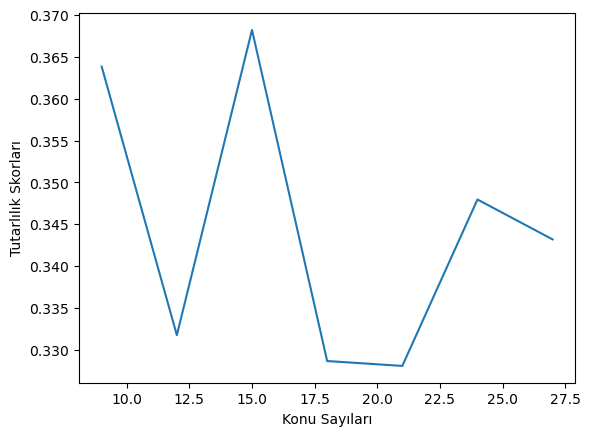

In [21]:
import matplotlib.pyplot as plt
plt.plot(konu_sayisi_listesi,tutarlilik_skorlar_listesi,"-"),
plt.xlabel("Konu Sayıları")
plt.ylabel("Tutarlılık Skorları")
plt.show()

In [22]:
 #Oluşturulan soyut konular içerisinde en fazla bulunan terimler
konular = lda_model.print_topics(num_words = 7)
konular = sorted(konular,key = lambda x : x[0])
for konu in konular:
    print(konu)

(1, '0.014*"yüzde" + 0.005*"parti" + 0.005*"chp" + 0.005*"göre" + 0.005*"öcalan" + 0.004*"aday" + 0.004*"var"')
(2, '0.004*"iyi" + 0.003*"var" + 0.003*"olarak" + 0.002*"bin" + 0.002*"müdürlüğü" + 0.002*"ateş" + 0.002*"emniyet"')
(3, '0.006*"suriye" + 0.004*"türkiye" + 0.004*"koruma" + 0.004*"bitki" + 0.004*"abd" + 0.003*"erdoğan" + 0.003*"rusya"')
(4, '0.005*"kılıç" + 0.005*"yüzde" + 0.003*"şubat" + 0.003*"göre" + 0.003*"hsk" + 0.003*"önce" + 0.003*"ay"')
(5, '0.014*"türkiye" + 0.005*"olarak" + 0.004*"olan" + 0.004*"abd" + 0.003*"yer" + 0.003*"dünya" + 0.003*"göre"')
(7, '0.008*"yıllık" + 0.007*"izin" + 0.005*"çikolata" + 0.005*"türkiye" + 0.005*"olarak" + 0.005*"göre" + 0.005*"bin"')
(9, '0.006*"türkiye" + 0.005*"yavaş" + 0.005*"chp" + 0.004*"parti" + 0.004*"erdoğan" + 0.003*"olarak" + 0.003*"ankara"')
(10, '0.004*"paylaş" + 0.003*"polis" + 0.003*"i̇stanbul" + 0.003*"yeni" + 0.003*"ünlü" + 0.003*"kişi" + 0.003*"darp"')
(12, '0.018*"tanzim" + 0.012*"satış" + 0.009*"parti" + 0.008*"erdo

In [23]:
pyLDAvis.enable_notebook()
gorsel = pyLDAvis.gensim.prepare(lda_model, dokuman_terim_matrisi, kelime_listesi, mds='mmds')
pyLDAvis.display(gorsel)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
